### Team Project: Part 1

#### Team Info:
* **Project Title:** Signal of AI Investment: Job Trends and Skill Insights
* **Team Name:** SkillSurge
* **Team Members - PIDs:**
    * Jake Fortuna - jakef04
    * Subhan Shrestha - subhan21
    * Sy Traore - syt
    * Samuel Petrov - spetrov26
    * Harman Singh - harman27
#### Project Introduction:
* **Initial description of the project topic:**   
    * Use LinkedIn API, Indeed, and other company career pages to search for job trends and analyze how companies are investing in AI research, using job openings as a proxy for investment priority or as indicators of skill shortage. By querying the job skills required in numerous posting, we can identify which AI-related skills are in-demand in today's market. This will not only allows us to aid companies in formulating strategies to retain employees but will also serve as a tool used in education to highlight what in-demand skills need to be taught to adequately equip students for the current job market.
* **Research questions we planed to address:**
    1. What are some observable trends with AI-related skills across job posting throughout the years?
    2. How do required skills posted under AI-related jobs differ between industries (i.e. healthcare, tech, finance)?
    3. How does AI job demand vary by geographic location in the United States?
    4. Can we predict what skills will be in-demand in the future?
    5. What is the distribution of AI-related job postings based on required experience level?
       * How do required skillsets change depending on experience level?  
    6. What degrees or certifications are most commonly required for AI-related positions?
* **Description of potential source data that would be relevant (including links or references if possible):**
    * Use web scraping/text analysis to collect job descriptions, required skills, required degrees/certifications, experience levels, and more.
      * Perform web scraping on the following websites (will continue to find more sources):
        * Glassdoor: https://www.glassdoor.com/Community/index.htm
        * Indeed: https://www.indeed.com/
        * U.S. Department of Labor (O*NET): https://www.onetonline.org/ 
        * LinkedIn (may attempt utilizing LinkedIn API): https://www.linkedin.com
        * Various company career pages
    * Research GitHub repositories for datasets that have historical job listing data based on job title and skills
    * Extract formated data on market trends, AI job postings, and more from Kaggle: https://www.kaggle.com/

### Team Project: Part 2

## Global Question

### A look into the past and present of AI interactivity in the US job market

Artificial Intelligence to transforming the world in ways that we could have not imagined a couple years ago. As the technological landscape continues to evolve rapidly, it is easy to overlook patterns and trends that could help us better navigate such a complex and exploratory field. With this in mind, we sought to answer the following question:

* **What are some observable trends with AI-related skills across job posting throughout the years?**
 
How do we define "trends" and what in specific would we be looking for? Accordingly, to narrow the scope of our research, we decided to answer better defined questions that dig deeper into how trends can be measured:

  * 1. **How do required skills posted under AI-related jobs differ between industries (i.e. healthcare, tech, finance)?**
  * 2. **How can job postings on AI be proxies for investment priorities?**
  * 3. **How does AI job demand vary by geographic location in the United States?**

Source Data Used:
* We used several datasets from kaggle and statista to merge together and also use idependently:
   * US City Locations - https://www.kaggle.com/datasets/bharxhav/us-city-populations-and-coordinates
   * Historical job postings mined from LinkedIn API - https://www.kaggle.com/datasets/kanchana1990/ai-and-ml-job-listings-usa
   * AI Investment - https://www.statista.com/statistics/1424667/ai-investment-growth-worldwide/
   * Urban Connectivity - https://www.kaggle.com/datasets/vellis1/us-cities-urban-connectivity
   * State Names Data - Homework 3 Dataset

## Question 1: 

AI-related jobs are booming at the moment and required skills may vary widely depending on the role. Therefore, the big question individuals may ask is: **How do required skills posted under AI-related jobs differ between industries (i.e. healthcare, tech, finance)?**

How do we measure "required skills" across industries? We can aggregate job postings based on keywords and industry tags from job descriptions. We can then quantify the most frequently listed skills for each job listing across industries. This leads us to an even better defined question: **Which skills are most commonly listed in AI-related job postings across various industries and how do they differ in frequency by industry?**

## Analysis:

We started our analysis by researching for datasets that contain historical AI-related job posting. We then uploaded the chosen files for further analysis and data cleaning.

In [8]:
import pandas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.linear_model import LinearRegression
import sklearn.metrics.pairwise
import sklearn.cluster
import sklearn.decomposition
import ipywidgets as widgets
from IPython.display import display

pandas.options.display.max_rows = 1000
AIjobs_industry = pandas.read_csv('ai_ml_jobs_linkedin.csv')
Investment_Data = pandas.read_csv('Investment_Data_new.csv')

In [9]:
%matplotlib widget

After uploading the files, we began a data cleaning process that allows us to analyze job listings with a dataset across multiple industries.

In [11]:
#removing any duplicate job listings
unique_listing = AIjobs_industry.drop_duplicates().copy()

#create new column that hold the job listing's indexes
unique_listing['listing_id'] = unique_listing.index

#job listings contain multiple sectors, so split into multiple sectors into a list
unique_listing['unique_sectors'] = unique_listing['sector'].str.replace(', and ', ', ').str.split(', ')

#fill missing sector data with Not Listed
unique_listing['unique_sectors'] = unique_listing['unique_sectors'].fillna('Not Listed')

#create separate rows for each individual sector that was previously split into multiple sectors
unique_listing2 = unique_listing.explode('unique_sectors')

#set all sectors names to lowercase for further analysis
unique_listing2['unique_sectors'] = unique_listing2.unique_sectors.map(lambda sector: sector.lower())

#convert each string sector into a single item list
unique_listing2['unique_sectors'] = [[sector] for sector in unique_listing2['unique_sectors']]

In [12]:
#define broad industry categories as a list of specific keyword sectors from orignial datatable
business_services = ['human resources services',
'advertising services',
'marketing services',
'engineering services',
'business consulting and services',
'information services',
'design services',
'financial services',
'public relations and communications services',
'translation and localization',
'social networking platforms and marketing services',
'outsourcing and offshoring consulting',
'research services',
'business consulting and services and outsourcing and offshoring consulting',
'defense and space manufacturing and research services',
'consumer services',
'legal services',
'information and media and information services', 
'real estate',
'leasing non-residential real estate',
'hospitality',
'staffing and recruiting and financial services']

education_nonprofit = ['higher education',
'research',
'professional training and coaching',
'e-learning providers',
'non-profit organizations',
'non-profit organizations and primary and secondary education']

finance = ['banking and financial services',
'banking',
'investment banking',
'investment management',
'insurance',
'financial services and banking',
'banking and investment banking',
'venture capital and private equity principals',
'capital markets']

healthcare = ['mental health care',
'medical equipment manufacturing',
'health and human services',
'medical device',
'wellness and fitness services',
'hospitals and health care',
'insurance and hospitals and health care',
'financial services and hospitals and health care',
'hospitals and health care and medical equipment manufacturing']

engineering = ['defense and space manufacturing',
'aviation & aerospace',
'civil engineering',
'oil and gas',
'renewable energy semiconductor manufacturing',
'defense and space manufacturing and aviation and aerospace component manufacturing',
'food and beverage manufacturing',
'computers and electronics manufacturing',
'semiconductor manufacturing',
'motor vehicle manufacturing',
'appliances',
'electrical',
'electronics manufacturing and manufacturing',
'computer hardware manufacturing',
'defense & space',
'motor vehicle parts manufacturing',
'industrial machinery manufacturing',
'climate data and analytics',
'railroad equipment manufacturing',
'renewable energy equipment manufacturing',
'manufacturing',
'automation machinery manufacturing',
'chemical manufacturing',
'semiconductors',
'robotics engineering',
'construction']

media_entertainment = ['entertainment providers',
'movies',
'videos',
'sound',
'information and media',
'computer games and social networking platforms',
'social networking platforms',
'spectator sports',
'online audio and video media',
'gambling facilities and casinos and spectator sports']

retail_consumer = ['retail',
'consumer electronics',
'retail and retail apparel and fashion']

technology = ['internet publishing',
'software development',
'staffing and recruiting',
'technology',
'information and internet',
'it services and it consulting',
'information technology & services',
'staffing and recruiting and it services and it consulting',
'computer and network security',
'software development and information services',
'information services and it services and it consulting',
'data infrastructure and analytics',
'it system custom software development',
'biotechnology research and research services',
'staffing and recruiting and technology',
'internet marketplace platforms',
'biotechnology research',
'software development and it system custom software development',
'telecommunications',
'information and internet and motor vehicle manufacturing',
'information and internet and it services and it consulting',
'construction and software development',
'financial services and software development',
'desktop computing software products',
'climate technology product manufacturing',
'software development and it services and it consulting',
'software development and advertising services',
'information and internet and financial services',
'it services and it consulting and financial services',
'software development and technology',
'computer networking',
'information services and technology',
'information and internet and software development',
'software development and engineering services',
'utilities',
'information and media and staffing and recruiting',
'information services and software development',
'legal services and software development',
'computer networking products',
'it system data services',
'it services and it consulting and hospitals and health care',
'software development and data infrastructure and analytics',
'software development and internet marketplace platforms']

logistics = ['ground passenger transportation']

other = ['not listed']

This cell above contains multiple broad industry definitions that are categorized into large lists of keyword sectors from the original dataset. The cell is too large to fully display to a reader.

Our next step was to categorize super specific job sectors into more understandable industry names that will make analysis easier to comprehend.

In [15]:
#map the keyword sectors to the predefined broad industry categories
unique_listing2['Industry'] = unique_listing2.unique_sectors.apply(lambda sector: 
                   ['Technology' for words in sector if words in technology]
                or ['Business Services' for words in sector if words in business_services]
                or ['Education & Non-Profit' for words in sector if words in education_nonprofit]
                or ['Finance' for words in sector if words in finance]
                or ['Healthcare' for words in sector if words in healthcare]
                or ['Engineering' for words in sector if words in engineering]
                or ['Media & Entertainment' for words in sector if words in media_entertainment]
                or ['Retail & Consumer' for words in sector if words in retail_consumer]
                or ['Logistics & Transportation' for words in sector if words in logistics]
                or ['Other' for words in sector if words in other])

#convert Industry column to string for graphical use
unique_listing2['Industry'] = unique_listing2['Industry'].astype(str)

Further, we aggregated the dataset on AI-related skill keywords to ultimately create a graph illustrating our findings.

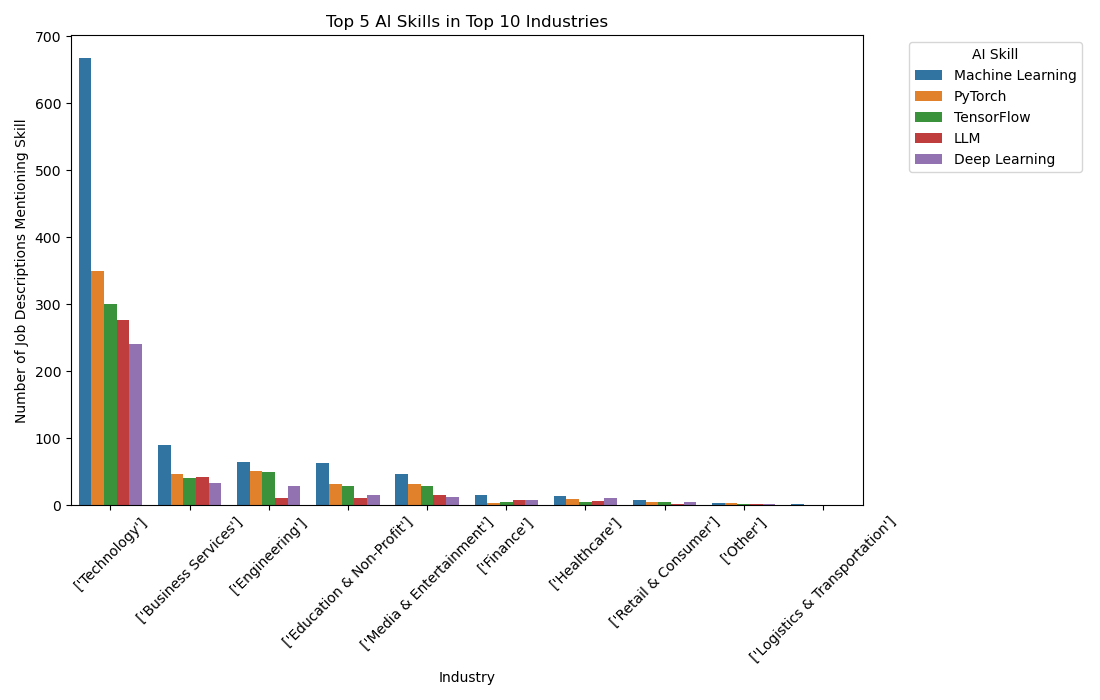

In [17]:
# === AI Skill Demand Visualization (Grouped by Industry) ===

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean description to lowercase
unique_listing2['description_lower'] = unique_listing2['description'].str.lower()

# Define AI skills to extract
ai_skills = [
    'Machine Learning', 'Deep Learning', 'NLP', 'Computer Vision',
    'TensorFlow', 'PyTorch', 'Keras', 'Scikit-learn', 'Pandas', 'NumPy',
    'OpenCV', 'LLM', 'Transformers', 'Reinforcement Learning'
]

# Create a binary column for each AI skill
for skill in ai_skills:
    unique_listing2[skill] = unique_listing2['description_lower'].str.contains(skill.lower(), na=False)

# Get top 10 industries by number of job postings
top_industries = unique_listing2['Industry'].value_counts().head(10).index.tolist()

# Filter to those industries only
df_top_industries = unique_listing2[unique_listing2['Industry'].isin(top_industries)]

# Get top 5 most mentioned skills in those industries
top_5_skills = df_top_industries[ai_skills].sum().sort_values(ascending=False).head(5).index.tolist()

# Group by Industry and sum the skill counts
skill_counts = df_top_industries.groupby('Industry')[top_5_skills].sum().loc[top_industries]

# Reshape for visualization
skill_melted = skill_counts.reset_index().melt(id_vars='Industry', var_name='Skill', value_name='Count')

# Plot grouped bar chart
plt.figure(figsize=(11, 7))
sns.barplot(data=skill_melted, x='Industry', y='Count', hue='Skill')
plt.title('Top 5 AI Skills in Top 10 Industries')
plt.xlabel('Industry')
plt.ylabel('Number of Job Descriptions Mentioning Skill')
plt.xticks(rotation=45)
plt.legend(title='AI Skill', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [18]:
matplotlib.pyplot.close()

The dataset was filtered to include the top 10 industries with the highest volume of AI-related job postings. Within these industries, five prominent AI skills—Machine Learning, PyTorch, TensorFlow, LLM, and Deep Learning—were extracted from job descriptions using keyword matching. The number of postings mentioning each skill was aggregated and visualized in a grouped bar chart.

The results show a massive concentration of AI job demand in the Technology sector, which far outpaces all other industries. Within this sector, Machine Learning was mentioned in over 650 job descriptions, followed by strong presence of PyTorch, TensorFlow, and LLMs. In contrast, industries like Business Services, Engineering, and Education & Non-Profit showed much smaller but still meaningful demand across all five skills. The remaining sectors—such as Finance, Healthcare, and Retail & Consumer—had comparatively lower levels of AI skill mentions overall.

## Conclusion:
The analysis reveals that Technology is by far the dominant industry for AI skill demand, particularly for general-purpose and framework-based skills like Machine Learning, PyTorch, and TensorFlow. While other industries show some level of demand, the disparity in counts suggests that AI talent needs are heavily centralized in the tech sector. Additionally, the presence of LLMs and Deep Learning across multiple industries—even at lower levels—indicates that cutting-edge AI techniques are gaining traction beyond purely tech-focused companies. These trends reflect both the maturity of AI adoption in each industry and the diversity of use cases driving demand for specific skills. Ultimately, our analysis has allowed us to answer our question: **Which skills are most commonly listed in AI-related job postings across various industries and how do they differ in frequency by industry?** 

## Question 1 (Continued):  

Although individuals may ask, **How do required skills posted under AI-related jobs differ between industries like healthcare, tech, and finance?**, hardcore job seekers may start to ask the following question: Which industries are seeing the most demand for AI-related jobs?

Considering the large-scoped nature of that question, it may be best to also take a step back in our analysis. Specifically, we can use the same job postings as before that are tagged with correlating industries. By counting the number of AI-related job listings within each industry, we can help answer a more measurable question: **How many AI-related job postings appear in each industry and what do the counts reveal about job demands over time?**

## Analysis:

As we began our continued analysis on question 1, we implemented a process to create a new dataframe that contained the total number of job listings per industry. Our end result/goal was to visual those quantified counts in the dataframe into a bar graph.

In [24]:
#copy dataset for further manipulation
by_industry = unique_listing2.copy()

#group the data based on the industries
d = by_industry.groupby('Industry')

#count the number of listings for each industry
size_d = d.size()

#convert into usable dataframe
df = pandas.DataFrame(size_d, columns = ['Number of Job Listings'])

#set index to industries
df['Industry'] = df.index

#create new table with only relevant information
sector_table = df[['Industry', 'Number of Job Listings']]

#sort table by number of listings
sorted_table = sector_table.sort_values('Number of Job Listings', ascending=False)

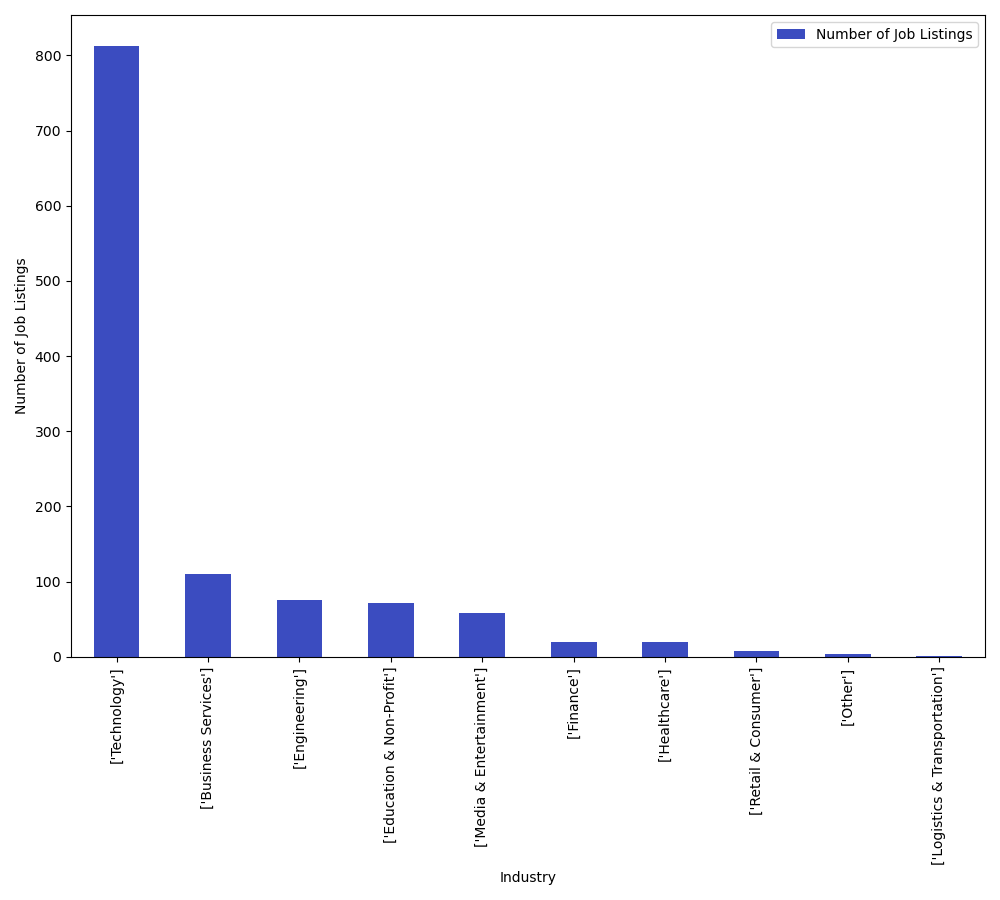

In [25]:
#create bar graph display number of listings per broad industry
Axes = sorted_table.plot.bar(x = 'Industry',y = 'Number of Job Listings',figsize=(10,9), colormap=plt.cm.coolwarm)
Axes.set_ylabel('Number of Job Listings')
plt.tight_layout()


In [26]:
matplotlib.pyplot.close()

In the bar graph above, we can see the distribution of total job listings per industry.

As next steps, we decided to go deeper into our analysis and determine the number of job listings per industry over time, specifically from 2022-2024.

In [29]:
#remove rows without published date and convert the published dates to datetime format
cleaned_date_unique_listing2 = unique_listing2.dropna(subset=['publishedAt']).copy()
cleaned_date_unique_listing2['Date_listed'] = pandas.to_datetime(cleaned_date_unique_listing2['publishedAt'])

#extract only the year into a new column
#Referenced pandas library for dt.year documentation
#link: https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html
cleaned_date_unique_listing2['Year_listed'] = cleaned_date_unique_listing2['Date_listed'].dt.year

#Referenced pandas library for pivot_table documentation
#link: https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html
#create table displaying number of job listings per industry for each year
years_table = pandas.pivot_table(cleaned_date_unique_listing2,values='listing_id', index = 'Industry',columns='Year_listed',aggfunc='count',
                                 fill_value=0).transpose()
years_table.index = years_table.index.astype(str)
years_table

Industry,['Business Services'],['Education & Non-Profit'],['Engineering'],['Finance'],['Healthcare'],['Logistics & Transportation'],['Media & Entertainment'],['Other'],['Retail & Consumer'],['Technology']
Year_listed,,,,,,,,,,
2022,1,0,0,0,0,0,0,0,0,2
2023,3,5,3,1,1,0,0,0,1,42
2024,105,66,73,18,18,1,57,3,7,759


This table above illustrates the distribution of job listings per industry over time (2022-2024). 

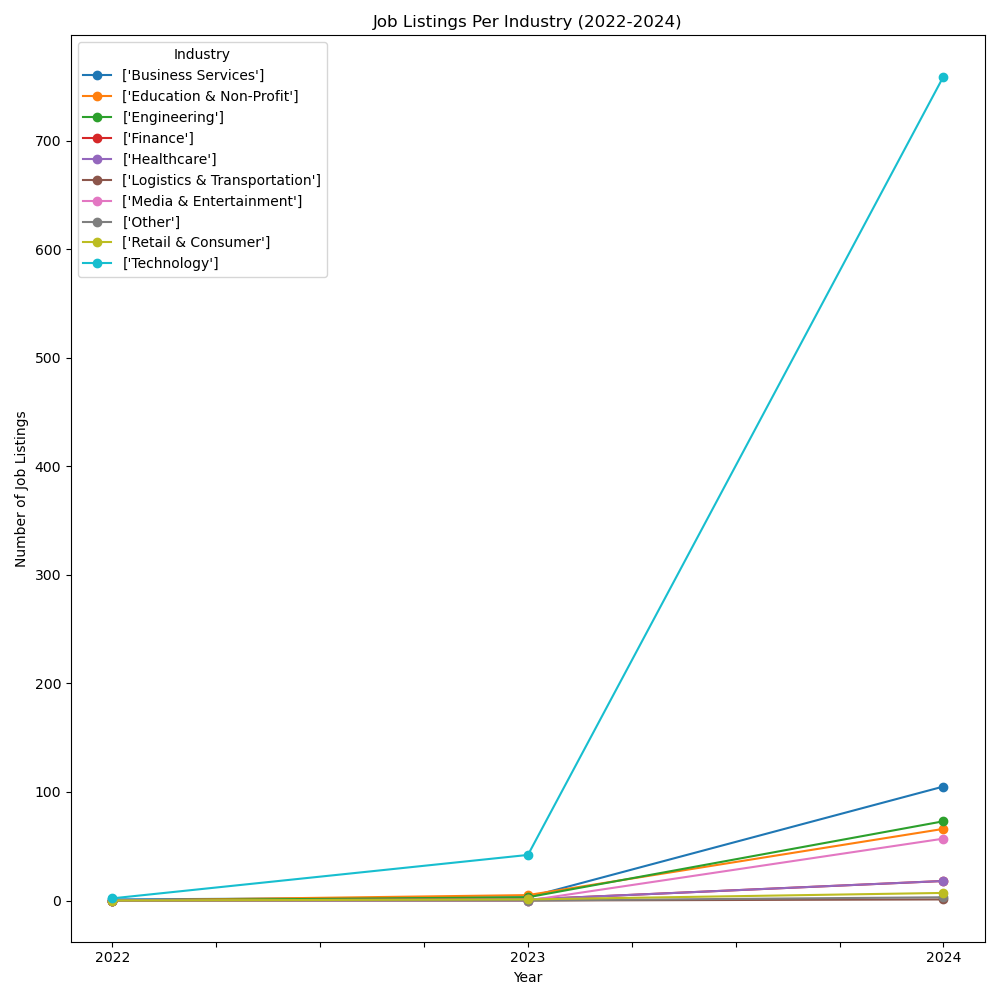

In [31]:
#create line graph showing number of job listings per year for each industry
ax = years_table.plot.line(figsize=(10,10),colormap=plt.cm.tab10,marker='o')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Job Listings')
ax.set_title('Job Listings Per Industry (2022-2024)')
plt.tight_layout()

In [32]:
matplotlib.pyplot.close()

The line graph above shows how the number of job listings change over time across all industries.

As previously mentioned, the dataset was categorized into more understandable industry names to include the top 10 industries with the highest volume of AI-related job postings. The results show that the Technology industry is a very prominent industry that most AI-related job postings are centered around. The Technology industry alone had 813 job listings that could have been considered related to the technology sector. The closest industry to Technology, Business Services, surprisingly only had 110 AI-related job listings. It is also important to note that all other industries, such as Finance and Healthcare, had a considerably less number of job listings. Lastly, by analyzing the line graph, we can see that 2024 had a very large spike in AI-related job listings across all industries, especially the Technology sector.

## Conclusion:

The analysis reveals that over the span of three years, AI-related job demand has tremendously increased. By analyzing the Technology industry alone, having a number of job listings increase from 2 -> 42 -> 759 during the years of 2022, 2023, and 2024, portrays that companies are seeking more and more individuals with AI-related skillsets and expertise. While other industries illustrated slower growth, they still demonstrated a rise in AI-related job demand with a gradual increase in the number of job listings over time. This information allows students and job seekers to prioritize learning skills that pertain the most to the Technology industry if they want a better chance of landing an AI-related job in today's job market. As stated in the analysis, the total number of job listing per industry are as follows:
* Technology, 813 
* Business Services, 110
* Engineering, 76
* Education & Non-Profit, 71
* Media & Entertainment, 58
* Finance, 19
* Healthcare, 19
* Retail & Consumer, 8
* Other, 3
* Logistics & Transportation, 1

Utlimately, our analysis allows us to answer our following question: **How many AI-related job postings appear in each industry and what do the counts reveal about job demands over time?**

However, a limitation in the data is that the job listings were mined by an external user. Therefore, we can not know for certain if the information is 100% accurate. Nevertheless, because the dataset was uploaded to kaggle with hundreds of downloads, it is safe to assume that it is trusted by many other data scientists.

## Question 2
Private sector investments play a major role in influencing the development and direction of technological advancement. Although investment patterns can illustrate a trend, hiring activities are a clear indicator of industry shifts and priorities. Therefore individuals may couple the two subjects together and ask: **How can job postings on AI be proxies for investment priorities?**

By aggregating data on annual private AI investment in the United States and the number of AI-related job postings per year, we can analyze how these two trends develop simultaneously. Accordingly, this curiousity can lead us to answer a more measurable question: **How closely do investment levels in AI correlate with the volume of AI-related job positings over time?**

## Analysis:

We begin our analysis for question 2 by removing duplicate job listings in our dataset we used in question 1. We do this so that we do not double count the same job listings that crosslist in multiple industries. This is critical because we are not counting frequency by industry anymore.

In [39]:
#remove duplicates to avoid double counting same job listings that appear in multiple industries
unique_listing_peryear = cleaned_date_unique_listing2.drop_duplicates(subset=['listing_id','Year_listed'])

#group data by year, count the job listings, and create new dataframe to plot
new_grouped = unique_listing_peryear.groupby('Year_listed')
all_peryear = new_grouped['listing_id'].count()
all_peryear_table = pandas.DataFrame(all_peryear)
all_peryear_table.rename(columns={'listing_id' : 'Number of Job Listings'}, inplace=True)
all_peryear_table.index = all_peryear.index.astype(str)

Our next step is to create a line graph showing the number of job listings across all industries for the years of 2022-2024.

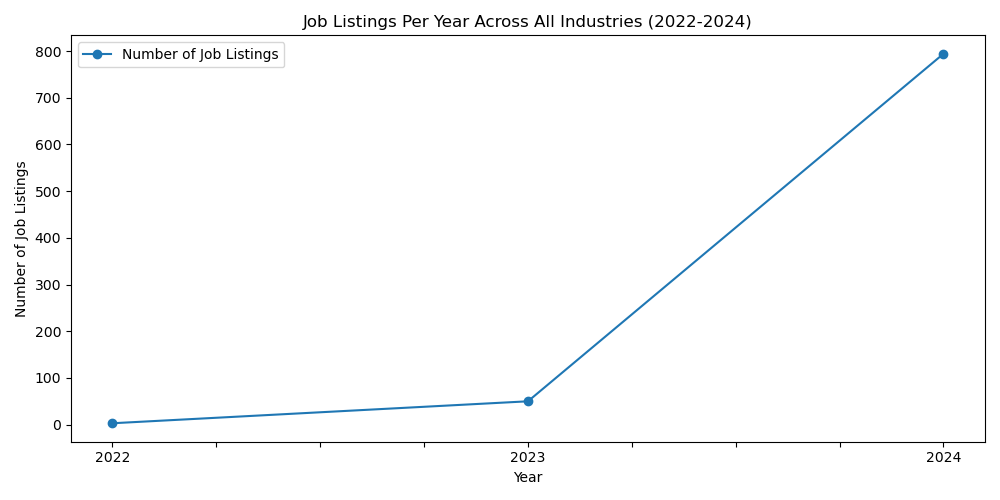

In [41]:
#create line graph showing number of job listings per year across all industries
ax1 = all_peryear_table.plot.line(figsize=(10,5), colormap=plt.cm.tab10,marker='o')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Job Listings')
ax1.set_title('Job Listings Per Year Across All Industries (2022-2024)')
plt.tight_layout()

In [42]:
matplotlib.pyplot.close()

This line graph above illustrates the number of job listings per year across all industries.

Further, we cleaned the investment datatable to be correctly formatted for analysis and create a line graph showing the investment trends.

In [45]:
#reformat data by removing columns, rows, renaming columns, and converting data into integers and floats for further analysis
cleaned_Investment = Investment_Data.drop(Investment_Data.columns[[1,3]], axis=1)
cleaned_Investment = cleaned_Investment.drop(index=0)
cleaned_Investment = cleaned_Investment.rename(columns={cleaned_Investment.columns[0]: 'Year'})
cleaned_Investment = cleaned_Investment.rename(columns={cleaned_Investment.columns[1]: 'Investment in United States ($bn)'})
cleaned_Investment = cleaned_Investment.drop(index=1)
cleaned_Investment.Year = cleaned_Investment.Year.map(lambda s: int(str(s).strip().replace('*','')))
cleaned_Investment['Investment in United States ($bn)'] = cleaned_Investment['Investment in United States ($bn)'].map(lambda s: float(str(s).strip()))

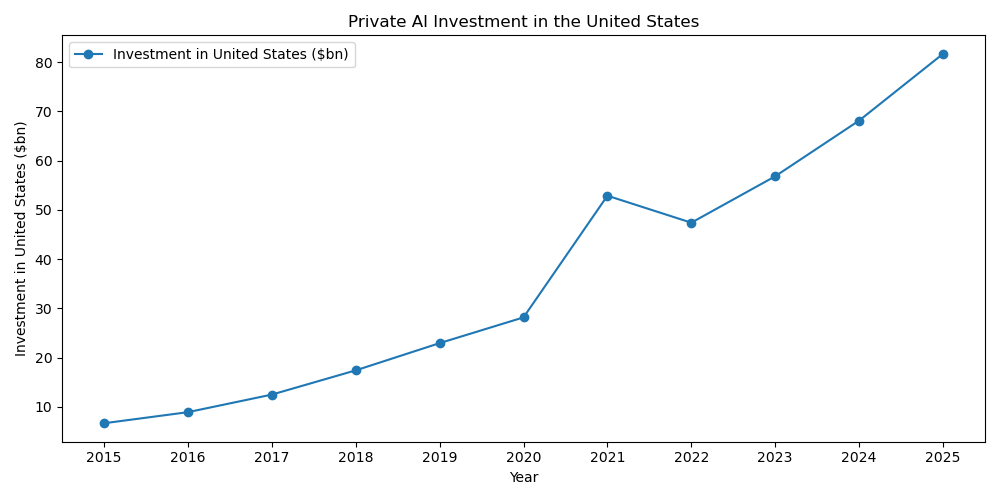

In [46]:
#create line graph showing AI investment per year in the United States
ax2 = cleaned_Investment.plot.line(x='Year',y='Investment in United States ($bn)', figsize=(10,5), colormap=plt.cm.tab10,marker='o')
ax2.set_xlabel('Year')
ax2.set_ylabel('Investment in United States ($bn)')
ax2.set_title('Private AI Investment in the United States')
ax2.set_xticks(cleaned_Investment['Year'])
plt.tight_layout()

In [47]:
matplotlib.pyplot.close()

The line graph above shows the investment in billions per year on AI within the United States.

We then performed a re-alignment on tables to be able to compute a correlation between the investment data and number of job listings.

In [50]:
#create new dataframe and set index to year
investments = cleaned_Investment[['Investment in United States ($bn)']]
investments.index = cleaned_Investment['Year']

#convert the index (year listed) to a column
listing_peryear = all_peryear_table.reset_index()

#rename column to year and convert to integer
listing_peryear.rename(columns={'Year_listed' : 'Year'}, inplace=True)
listing_peryear['Year'] = listing_peryear['Year'].astype(int)

#merge two dataframes together on year
joint_tables = pandas.merge(investments, listing_peryear, on='Year',how='inner')

#compute correlation between the two for the years 2022-2024
correlation = joint_tables['Investment in United States ($bn)'].corr(joint_tables['Number of Job Listings'])
correlation

0.913769403218544

The number above portrays the correlation between the investment on AI in the US and the number of job listings in the US from 2022-2024.

## Conclusion:

From our results, we can identify a positive correlation between number of job listings in the US and investment on AI in the US. With a correlation of 0.913 we can conclude that both variables have a fairly high correlation between each other. Accordingly, it may be safe to say that investment levels in AI closely relate with the volume of AI-related job postings over time. Even by visually comparing the two graphs, we can also see a visual positive relationship between investment level and number of job postings. However, one limitation that may prevent us from making a strong assertion that job posting can be proxies for investment priorities, is that we were only able to calculate the correlation between the two variables within a short span of three years (2022-2024). Despite our investment data spanning back to 2015, our data of the number of job listings only included data from 2022 to 2024. Nevertheless, it is an interesting comparison that helpd us shed some light on our research question: **How closely do investment levels in AI correlate with the volume of AI-related job positings over time?**

## Question 3:

Mainstream depicitions of AI predicted a dystopian world where robots took over the world. While this may still be a distant possibility, we are now living through the beginning of what a world with AI looks like. Popular models like chatGPT and Gemini are more powerful than ever, and rather than a robot takeover, some fear a job takeover across the United States. With this in mind, individuals may ask themselves: **How does AI job demand vary by geographic location in the United States?** and worry if job demand is lower in cities they reside in.

But to answer that, we need to define what we mean by "geographic location" and determine how to measure demand. One approach is to use job listing data tagged with latitude and longitude coordinates, and apply clustering techniques to identify regions with higher concentrations of AI-related job roles. This allows us to ask a more data-driven question: **Can we use spatial clustering to uncover regional patterns in AI job demand across the United States?**

## Analysis:

In [56]:
# Downloaded from kaggle
jobs = pandas.read_csv('ai_ml_jobs_linkedin.csv')
location = pandas.read_csv('USPopulations.csv')
urban = pandas.read_csv('urban_connectivity.csv')
st_key = pandas.read_csv('StateNameData.csv')

In [57]:
# We might want to see how each AI listing compares throughout different locations
# We can first identify the individual city and state which is more useful, expand = True allows to make new columns in the df
jobs[['city', 'state']] = jobs['location'].str.split(', ', expand=True)

In [58]:
# Now we can merge the data sets
merged = pandas.merge(left = jobs, right = urban, left_on='location', right_on='Place_name', how='inner')

Here I am merging the job posting data with the urban data of each city.

In [60]:
# Now we want to merge with the other dataset so we can graph according to location, need to clean first
# replace city with blank space
location['clean_city'] = location.CITY.str.replace(' city', '', case=False)

In [61]:
# Need to merge with city key to access the state name instead of Abbrev
merged_st = pandas.merge(left=merged,right=st_key,left_on='state',right_on='Code',how='inner')
merged_st.head()

,title,location,publishedAt,companyName,description,applicationsCount,contractType,experienceLevel,workType,sector,...,Trail_Miles_Improved_Trails,Trail_Miles_Nature_trails,Number_of_Tracks_At_Park_Sites,Number_of_Tracks_At_community_schoolyards,Number_of_Exercise_Zones,Miles_of_car_free_roadways_in_parks,Permanent_car_free_roadways,State_y,Abbrev,Code
0,AI/ML Engineer,"New York, NY",2024-05-29,Wesper,THE OPPORTUNITY\n\nWesper is looking for a sma...,Over 200 applicants,Full-time,Mid-Senior level,Engineering and Information Technology,Internet Publishing,...,445.50,353.00,82.0,27.0,179.0,24.0,4.0,New York,N.Y.,NY
1,ML Engineer at 100% Remote,"San Jose, CA",2024-06-01,ELITE MENTE LLC,"Hello ,\n\nHope you are doing well!\n\nPlease ...",Be among the first 25 applicants,Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,...,75.60,37.90,0.0,0.0,42.0,0.0,0.0,California,Calif.,CA
2,ML Engineer-AI/ML,"Austin, TX",2024-04-30,Zortech Solutions,"Role: ML Engineer-AI/ML\n\nLocation: Austin, T...",67 applicants,Full-time,Entry level,Engineering and Information Technology,Human Resources Services,...,160.50,119.06,7.0,15.0,26.0,0.0,0.0,Texas,Tex.,TX
3,Research Analyst/ Jr. ML Engineer/ Jr. AI Engi...,"Irving, TX",2024-05-14,Ascendion,Job Description\n\nKnowledge and Skills\n\n\n ...,Over 200 applicants,Full-time,Entry level,"Research, Analyst, and Information Technology","Technology, Information and Internet",...,37.00,0.00,0.0,0.0,11.0,0.0,0.0,Texas,Tex.,TX
4,ML/AI Engineer - Optimization,"Houston, TX",2024-05-15,Cognitive Space,Cognitive Space uses the power of AI to help o...,85 applicants,Full-time,Mid-Senior level,Engineering and Information Technology,Internet Publishing,...,145.95,58.95,141.0,156.0,75.0,0.0,0.0,Texas,Tex.,TX


Here I am merging with the state key data set so that I can use the actual state name to merge with the location data set.

In [63]:
# We need to merge by city, state to account for same city names
location['city_state'] = location.clean_city + ', ' + location.STATE
merged_st['city_state'] = merged_st.city + ', ' + merged_st.State_y
merged.head()
merged2 = pandas.merge(left = merged_st, right = location, on = 'city_state', how='inner')

In [64]:
# We can group by the different cities that are in the table
g = merged2.groupby(by='city')
demand = g.size()
demand = pandas.DataFrame(demand, columns = ['Job_listings'])
demand['City'] = demand.index

In [65]:
# Now we can merge this back with orifinal merged table
merged3 = pandas.merge(left = merged2, right = demand, left_on='city', right_on='City', how='left')
merged3['listings_norm'] = (merged3.Job_listings/merged3['2022_POPULATION']) *100

In [66]:
city_sum = merged3[['city', 'LONG', 'LAT', 'Job_listings', 'listings_norm']]

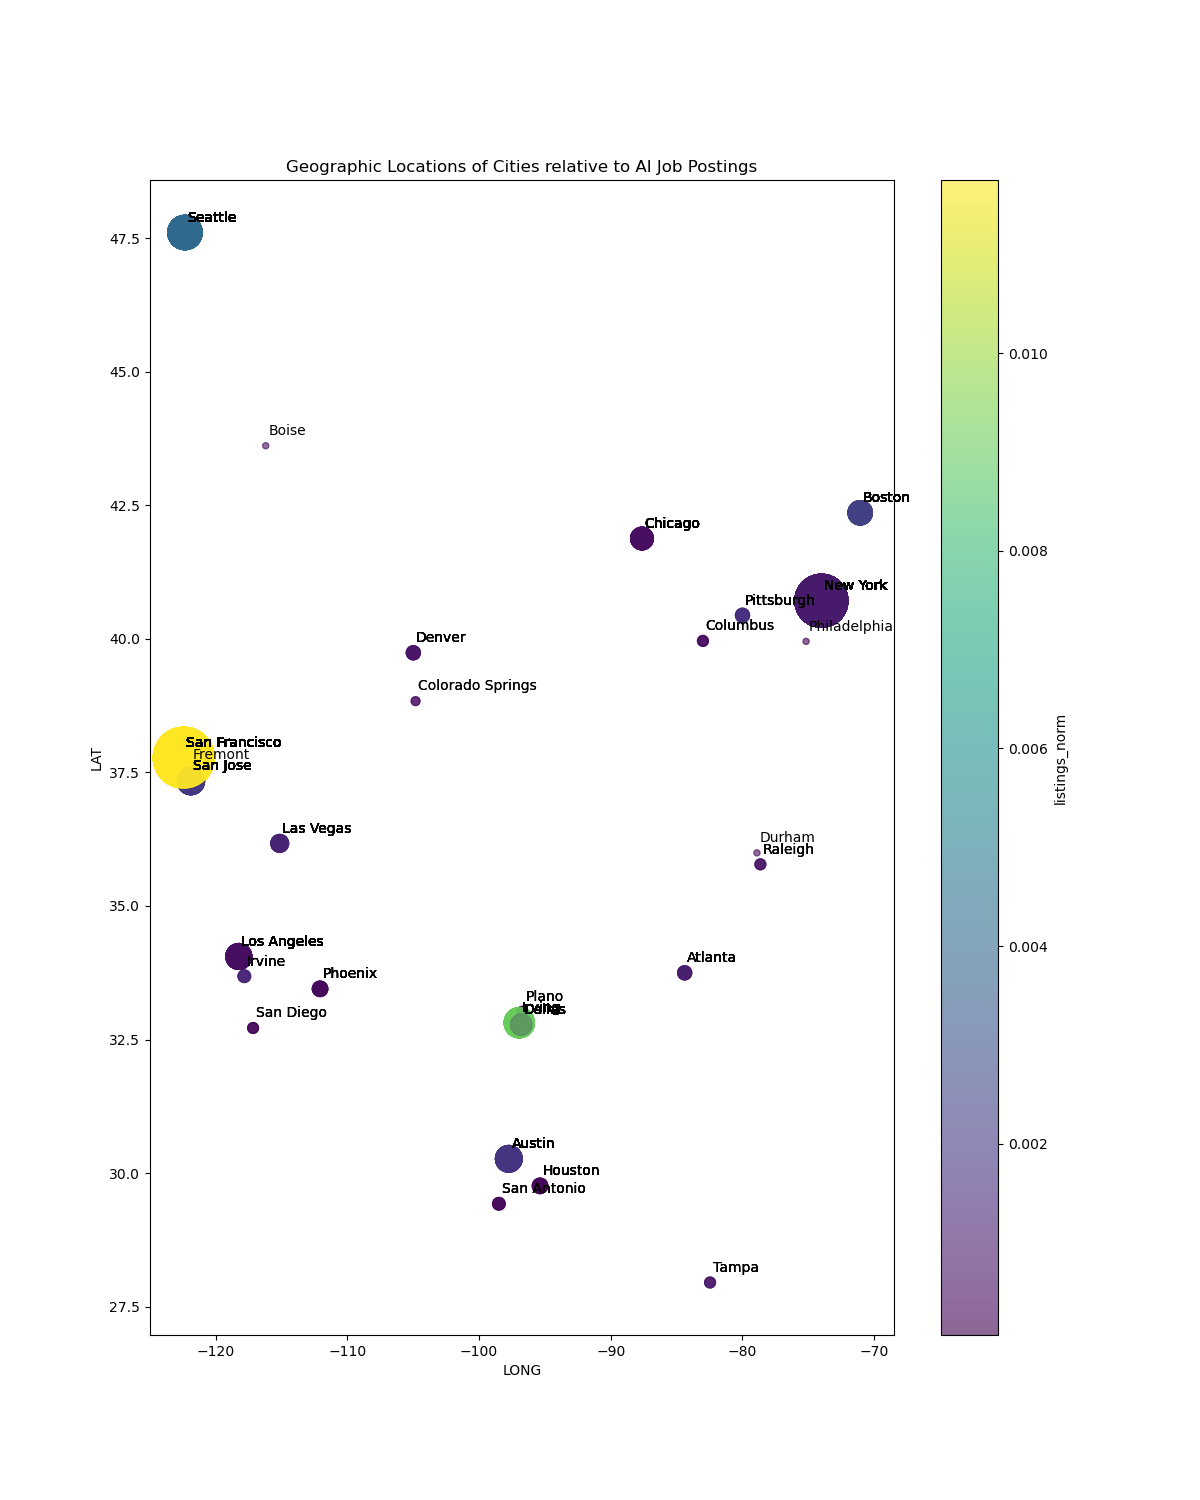

In [67]:
# We can graph the job listigns relative to location in the country
ax = city_sum.plot.scatter(x='LONG', y='LAT',s=city_sum.Job_listings*20, c = 'listings_norm', 
                           colormap=plt.cm.viridis,figsize = (12,15), alpha = 0.6, 
                           title = 'Geographic Locations of Cities relative to AI Job Postings')
for i,r in city_sum.iterrows():
    ax.text(r.LONG + 0.2,r.LAT + 0.2,r.city)

In [68]:
matplotlib.pyplot.close()

Here we can visualize the actual geographic location of where the job listings were posted. The size represents the total listings whereas the color represents the normalized amount of listings relative to population. Therefore, a city like San Francisco has a lot of total listings as well as a lot of relative listings

## Conclusion:

From our results, it is evident that the West Coast cluster is a dominant hotspot of AI-related jobs. Forming the most dense and significantly larger bubbles illustrates the high concentration of AI job demand in the Bay Area. We also see a predominant clustering in the northeast location, specifically with New York and Boston. Although not as large as the West Coast cluster, they form another significant regional cluster that depicts a mix of high job demand. It is also interesting to note that Seattle appears to have its own prominant clustering on the top left of the visualization. This is fascinating to see how our data reflects the tech job distributions we already associate with certain regions, such as Seattle being a major hub for companies like Microsoft and Amazon. Ultimately, our data shows how AI job demand is not evenly distributed across the US, but does form distinct regional clusters, allowing us to answer our question: **Can we use spatial clustering to uncover regional patterns in AI job demand across the United States?**

## First Iteration Conclusion

Brief summary of all main conclusions from our three questions:
* The Technology sector dominates AI skill demand, particularly for core tools such as Machine Learning, PyTorch, and TensorFlow.
* AI job postings have dramatically increased from 2022 to 2024, especially in the Technology sector, suggesting that AI skillsets are becoming increasingly sought after.
* A strong positive correlation of 0.913 was found between US private AI investment levels and number of job postings from 2022 to 2024, implying that higher investment levels often coincide with increased hiring.
* The Bay Area is a dominant AI job hub, followed by the Northeast, confirming that AI job demand is geographically concentrated and not uniformly distributed.


After conducting our research, we ended up having a list of questions we seek to answer in part 3.


Follow up questions:

1. How do average salaries for AI-related roles differ by industry and over time?
2. Are industries demanding more experienced professionals, or are they open to hiring early-career AI talent?
3. Can we predict what skills will be in-demand in the future?
4. What is the distribution of AI-related job postings based on required experience level? How do required skillsets change depending on experience level?
5. What degrees or certifications are most commonly required for AI-related positions?

### Team Project: Part 3

## Follow-Up Questions

For our last iteration of the data science process, we decided to build upon our previous analysis involving geographic demand while also digging deeper into insights related to job qualifications. These job qualifications included required experience levels, skills, degrees/certifications and more.

Therefore, to narrow the scope of our proposed follow up research questions, we decided to answer concrete questions that will truly allows us to aid companies in formulating strategies to retain employees and also help schools develop curriculumns by highlighting what in-demand skills need to be taught to adequately equip students for the current job market.

Accordingly, we decided to attempt answering/expanding upon the following follow-up questions:
* **Are industries demanding more experienced professionals and how do required skillsets change depending on experience level?**
* **What degrees or certifications are most commonly required for AI-related positions?**
* **How does AI job demand vary by geographic location in the United States?**
* **How often do skills appear relative to other skills?**

Source Data Used:
* We used the same data that was mentioned in Part 2, along with a dataset containing over three thousand webscrapped job listings from Linkedin and another kaggle dataset contain information on US cities from 2022.

## Follow-Up Question 1:

As most job seekings might encounter, the level of experience is often not always clear-cut in job listings. Some positions labeled as entry-level may list skills/tools that typically require more experience and suggest a much higher expectation. Therefore, a natural question may arise: **Are industries demanding more experienced professionals and how do required skillsets change depending on experience level?**

To dig into this question, we could analyze job postings by using dimensionality reduction techniques like PCA & MDS to see how similar job listings/descriptions are across roles. We could also analyze the frequency of AI-related skills mentioned in each job listing based on experience level. Lastly, we could also apply predictive models to understand whether a set of listed skills align more with different experience levels. Accordingly, this leads us to ask a much deeper, specific question: **Do the listed skill requirements, job responsibilities, and overall structure of job descriptions clearly communicate company expectations for experience in AI-related roles?**

## Analysis:

We began our analysis by reading in the webscraped job listings and cleaning the dataset in order to calculate the TFIDF matrix

In [81]:
Webscrape_list = pandas.read_csv('WebScrapped_LinkedIn_Job_Postings.csv')

Here is where we performed our data cleaning and computed the TFIDF matrix

In [83]:
import string

#remove the Time Posted column from data as it will not provide insight for our question. Also remove rows with missing description
Vital_columns = Webscrape_list.drop(columns=['Time Posted'])
Vital_columns = Vital_columns.dropna(subset=['Job Description'])

#clean the data by removing punctuation characters and create a bag of words for each row for further analysis
cleaned_punctuation = str.maketrans({x: ' ' for x in string.punctuation})
all_columns = ['Job Title' , 'Company' , 'Location', 'Job Description' , 'Employment Type', 'Job Function' ,'Industries']
Vital_columns['Bag'] = Vital_columns[all_columns].apply(lambda r: ' '.join(r.values.astype(str)).translate(cleaned_punctuation).lower().split(), axis=1)

data = Vital_columns.copy()

#calculate the TFIDF matrix 
TF = data.Bag.apply(lambda bag: pandas.Series(bag).value_counts())
DF = TF.count()
IDF = np.log(len(TF)/DF)
TFIDF = TF * IDF

Next we computed the consine similarity from the TFIDF matrix

In [85]:
#compute the cosine similarity matrix from the TFIDF matrix
docmags = (TFIDF * TFIDF).sum(axis=1)**0.5
nTFIDF = TFIDF.divide(docmags,axis=0)
znTFIDF = nTFIDF.fillna(0.0)
cossim = znTFIDF.dot(znTFIDF.transpose())

From the cosine similarity, we found the PCA table and then illustrated the structure of similarity with a scatterplot

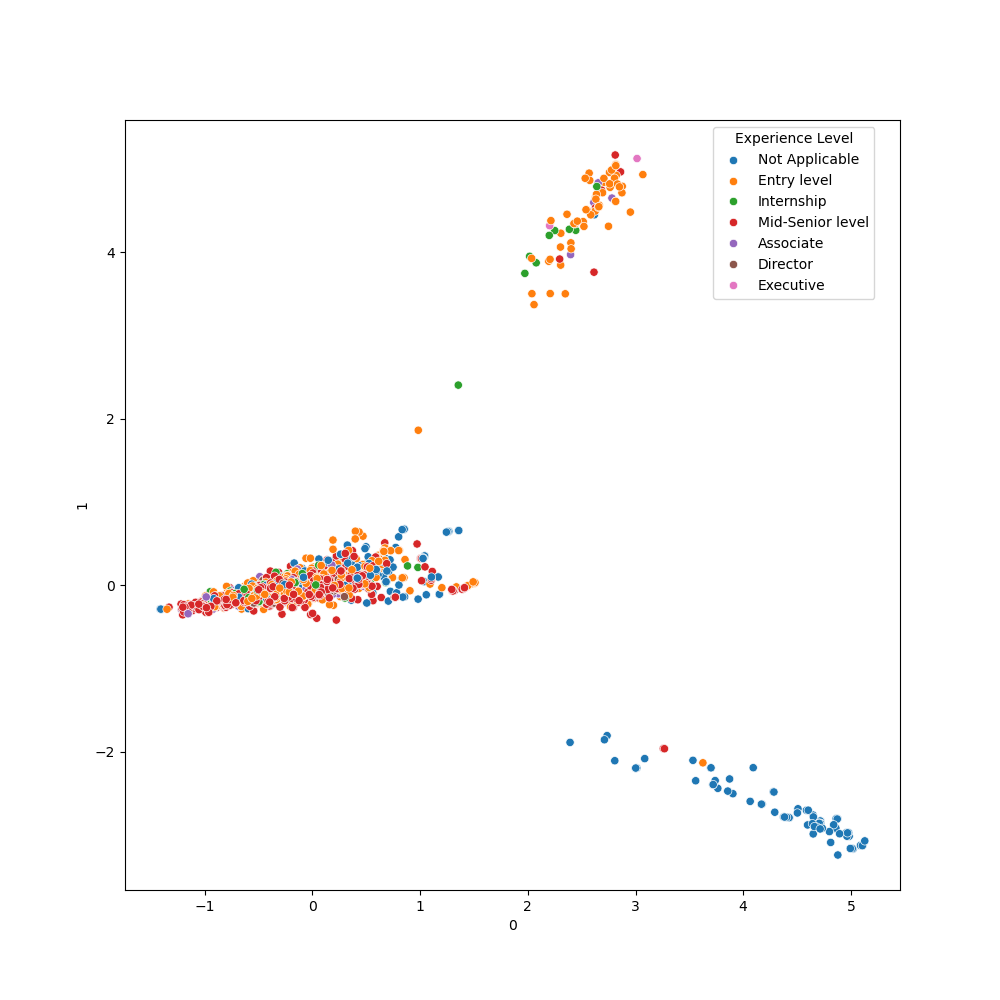

In [87]:
import sklearn.decomposition

#compute the PCA table to then illustrate the structure of similarity
pca = sklearn.decomposition.PCA()
tablePCA = pca.fit_transform(cossim)
tablePCA = pandas.DataFrame(tablePCA,index=cossim.index)

#Add the Seniority Level column from the originial dataset in order to use it for coloring the dots in the graph
tablePCA['Seniority Level'] = Webscrape_list.loc[tablePCA.index, 'Seniority Level']

#create a scatter plot of the first two components
plt.figure(figsize=(10, 10))
sns.scatterplot(data=tablePCA, x=0, y=1, hue = 'Seniority Level')
plt.legend(title='Experience Level', bbox_to_anchor=(0.75 , 1), loc='upper left')

In [88]:
matplotlib.pyplot.close()

Above is a scatterplot displaying the similarity of the job listings grouped by experience level. As shown, there are three distinct clusters with a single prominent cluster in the middle.

To further analyze the data, we then computed cosine distance and only selected the first 1,000 rows and columns for faster computation of MDS

In [91]:
#compute cosine distance then select only the first 1,000 rows and columns of the datatable for faster computation of MDS
cosdist = 1- cossim
cosdist_subset = cosdist.iloc[:1000, :1000]

Here we computed the MDS 2D table and then visualized the distances between the job listings based on experience level

In [ ]:
import sklearn.manifold

#compute MDS 2D table to then visualize the distances between points
mds =sklearn.manifold.MDS(n_components=2, dissimilarity='precomputed', n_init=3,max_iter=1000)
table2d = mds.fit_transform(cosdist_subset)
table2d = pandas.DataFrame(table2d, index=cosdist_subset.index,columns=['x','y'])

#Add the Seniority Level column from the originial dataset in order to use it for coloring the dots in the graph
table2d['Seniority Level'] = Webscrape_list.loc[table2d.index, 'Seniority Level']

#create a scatter plot of the MDS projection
plt.figure(figsize=(10,10))
sns.scatterplot(data=table2d, x='x',y='y', hue='Seniority Level')

In [ ]:
matplotlib.pyplot.close()

In the scatterplot above, it is evident that there are not distinct clustered based on experience level. This shows us how there is no clear seperation by experience level with job listings from every experience level being evenly scattered in the graph.

We then decided to analyze the AI skills mentioned in job descriptions and created a heatmap to display the frequency.

In [ ]:
#create a new column that has the job description fully in lowercase
Vital_columns['description_lower'] = Vital_columns['Job Description'].str.lower()

#create a binary column for each AI skill
for skill in ai_skills:
    Vital_columns[skill] = Vital_columns['description_lower'].str.contains(skill.lower(), na=False)

#group by Seniority Level and sum the skill counts
skill_counts_all = Vital_columns.groupby('Seniority Level')[ai_skills].sum()

#create heatmap of the skills mentioned per experience level
plt.figure(figsize=(12,8))
sns.heatmap(skill_counts_all, annot=True , fmt='.1f', cmap='YlOrRd')
plt.title('AI Skills Mentioned in Job Description per Experience Level')
plt.xlabel('AI Skill')
plt.ylabel('Experience Level')
plt.tight_layout()

In [ ]:
matplotlib.pyplot.close()

Above is the heatmap displaying the frequency of certion AI skills mentioned in the job descriptions. As seen in the heatmap, skills like machine learning and PyTorch are mentioned very often.

We were then interested in creating a tree model to see if certain AI skills mentioned in the job descriptions allows us to predict the experience level.

In [ ]:
import sklearn.model_selection
import sklearn.tree

#remove rows that do not contain seniority levels
usable_rows = Vital_columns.dropna(subset=['Seniority Level'])

#define the inputs and outputs for the model
x = usable_rows[ai_skills]
y = usable_rows['Seniority Level']

#split the data into a training and testing set
(x_train, x_test, y_train, y_test) = sklearn.model_selection.train_test_split(x,y, train_size=0.80)

#set the decision tree classifier and fit the data
tree= sklearn.tree.DecisionTreeClassifier(max_depth=4)
tree.fit(x_train, y_train)

In [ ]:
#use the tree model to make a prediction and convert the prediction into a series
y_pred = tree.predict(x_test)
y_pred = pandas.Series(y_pred, index=y_test.index, name="Prediction")

In [ ]:
#create a table showing the actual and predicted experience level based on the model
results = x_test.join(y_test).join(y_pred)

Comparison = results[['Prediction', 'Seniority Level']].copy()
Comparison['Actual Experience Level'] = Comparison['Seniority Level']
Comparison['Predicted Experience Level'] = Comparison['Prediction']
final_table = Comparison[['Actual Experience Level','Predicted Experience Level']]

final_table.iloc[:20]

In the table above, we can see that the predicted experience level often incorrectly assigns a job listings with an experience level.

## Conclusion:

In the PCA projection, we can see three distinct clusters; however, one of these clusters represents listings with "Not Applicable" experience level. The main clusters that stand out are the remaining two that display significant overlop with all kinds of experience levels. This allows us to visually understand that most job postings uver overlapping language across different seniority levels, which would make it difficult to fully distinguish roles only on their content. Accordingly, students may find it hard to determine if their are fit for a position if the job listing does not state experience level requirements. 

By reprojecting the cosine distance using MDS, we are able to see little to no clear separation of job listings by experience level as the 1,000 listings we analyzed appeared to be evenly scattered in the graph. Therefore, the MDS projections reinforces our speculation that experience levels are not clearly distinguishable based on textual data within job listings. Because of this, job seekers may find it hard to accurately choose what roles to apply for and also makes it harder for schools to match curriculums with industry expectation.

In order to better understand what differentiates job postings across experience levels, our heatmap was able to illustrate the frequency of AI skills mentioned in job descriptions. Based on the heatmap, it is evident that skills such as machine learning, deep learning, Pytorch, Tensorflow, and more, were the most commonly mentioned. The heatmap also portrays higher frequencies of words appearing in entry level and mid-senior level roles. Although this may appear as a useful insight, it is a little misleading. This deceptive trend is a result of the data having a disproportionate number of entry level and mid-senior level jobs to the other experience level. Accordingly, we must take this into account when making our conclusions about the data.

Based on the prediction table, there were multiple cases where entry level roles were predicted as mid-senior level and vice versa, based on the AI skills mentioned within the job descriptions. Additionally, most of the remaining experience level roles were misclassified as mid-senior or entry level positions. This occurance may indicate that there is a lack of differentiation in expectations between experience tiers; however, it is important to note once again that because the data included much more entry level and mid-senior level roles, the model may have bias and provide mislead predictions.

From our results, it is evident that AI-related job listings show overlap in skills requirements across experience levels, making it hard to distinguish roles solely on job descriptions. This ambiguity suggests that companies should structure their job listings to accurately reflect expectations, helping to attract/maintain appropriately qualified individuals. Our results also show that schools should introduce more advanced skills earlier in the curriculum to better equip students for the elevated expectations found in Entry level positions. Ultimately, these insights allow us to answer our question: **Do the listed skill requirements, job responsibilities, and overall structure of job descriptions clearly communicate company expectations for experience in AI-related roles?**

## Follow-Up Question 2:

The tech industry is evolving rapidly. With the rise of AI, tech companies are willing to invest a lot of money in individuals that are capable of developing cutting edge technoloy that either incorporates AI or develops AI models. Who are these individuals and what makes them special, we wonder. Additionaly, with everyone having their focus on AI, universities must respond accordingly by providing the necessary education and ressources to meet the workforce demands. This lead us to wonder **what degrees or certifications are most commonly required for AI-related positions.** 

## Analysis:

In [ ]:
import wordcloud

dirty = pandas.read_csv("WebScrapped_LinkedIn_Job_Postings.csv")

First, let's clean our dataset. We will remove punctuations. We will also mark key words as special words that we will look for in our text analysis.

In [ ]:
#removing any duplicate job listings
clean = dirty.drop_duplicates().copy()

# convert the content into a string to avoid errors when cleaning
clean["Job Description"] = clean["Job Description"].map(lambda s: str(s))

# clean data: remove ponctuations
clean["Job Description"] = clean["Job Description"].map(lambda txt: txt.replace('/', ' ').replace('(', '').replace(')', '').replace('\n', ' ')
                                                        .replace('\"', '').replace(',', '').replace('.', '').replace('*', '').replace('-',' ')
                                                        .replace("'", "").replace("’", "").replace(';', ' ').lower())

# create a new columns that will store each word in each job description in a list: to use for future analysis by city
clean['Description Bag'] = clean['Job Description'].map(lambda txt: txt.split())

# save description string with no punctuations
# clean["Job Description"] = clean['bag'].map(lambda lst: ' '.join(lst))

# # replace key sentences for degree names into words in order to count the frequency of each degree type
clean["Job Description"] = clean["Job Description"].map(lambda txt: txt.replace("math", "mathematics").replace("mathematicsematics", "mathematics").replace("ms", "master")
                                                        .replace("bs", "bachelor").replace("bachelors", "bachelor").replace("master's", "master").replace("masters", "master")
                                                        .replace("doctorate", "phd").replace("computer engineering", "computerengineering")
                                                        .replace("electrical engineering", "electricalengineering").replace("software engineering", "softwareengineering")
                                                        .replace("computer science", "computerscience").replace("data science", "datascience")
                                                        .replace("data analytics", "dataAnalytics"))

clean.head()

We will define words and sentences that are essential to our text analysis. We will define a list of words that are known to announce degrees requirement in a job post. We will also define a list of words that will serve as our list of degrees. These lists will be used to filter words in the job description.

In [ ]:
# we will look for keywords that announce degree requirement in a job post
degree_announcer_keywords = ["pursuing", "qualifications", "must have", "degree in", "required education",
                          "minimum requirements", "basic qualifications", "you must have",
                          "what you'll need", "education requirements"]

# the degrees we are looking for
degrees = ['phd', 'mathematics', 'aws', 'azure', 'bachelor', 
           'master', 'computerscience', 'computerengineering', 
           'electricalengineering', 'statistics', 'datascience', 'dataanalytics']

We will use the values in degree_announcer_keywords to find the index of the start of degrees announcement in a job description.

In [ ]:
# get the index of the degree announcement in the job description
def getAnouncementIndex(txt):
    found_index = -1
    for keyword in degree_announcer_keywords:
        index = txt.find(keyword)
        if index != -1:
            found_index = index
            break
            
    return found_index
    
# map the function to get the index of the degree announcement in each job description
clean['Degree Anouncement Index'] = clean['Job Description'].map(lambda txt: getAnouncementIndex(txt))

We will use the index found above and create a list of words that will contain all the degrees mentioned as required or prefered.

In [ ]:
# get a list of words from the index of the degree announcement to the end of the job description
def get_degree_bag(row):
    txt = row['Job Description']
    found_index = row['Degree Anouncement Index']
    if found_index != -1:
        return txt[found_index:].split()
    else:
        return []

# map the function to get a list of words for each job description
clean['Degree Bag'] = clean.apply(get_degree_bag, axis=1)

With the list of words obtained in the previous step, we can get the degrees and certifications mentioned in the job post

In [ ]:
# get the degrees and certifications mentioned as requirement in the job post
def getDegreesAndCert(lst):
    result = [word for word in lst if word in degrees]
    return result

# map the function to get a list of degrees and certifications for each job description
clean['degreesAndCert'] = clean['Degree Bag'].map(lambda lst: getDegreesAndCert(lst))

Now that we have a list of degrees and certifications, we want to count how many times the degree have been mentioned for each job description. We are doing this because a job post can asked for either a master or bachelor degree in computer science.

In [ ]:
# get the frequency of each degree
def getDegreeFreq(lst):
    vocab = set(lst)
    freqs = [(lst.count(word), word) for word in vocab]
    freqs = sorted(freqs, reverse = True)
    return freqs

# map the function to get each degree frequency for each job description 
clean['Degrees Frequency'] = clean['degreesAndCert'].map(lambda lst: getDegreeFreq(lst))

We will combine all the degrees and certifications found in each job description in a list. Then, we will compute the frequency of each element of the obtained list. This will give us a general overview of the degrees frequently mentioned in AI-related jobs.

In [ ]:
# combined the list of all degrees mentioned for each job post
all_degrees_and_cert = clean['degreesAndCert']
big_list = sum(all_degrees_and_cert, [])

# get the frequency of degrees
vocab = set(big_list)
big_freqs = [(big_list.count(word), word) for word in vocab]
big_freqs = sorted(big_freqs, reverse = True)
big_freqs

We will use a word cloud to see what degrees are frequently asked.

In [ ]:
# visualization
wc = wordcloud.WordCloud().generate_from_frequencies(dict([(w,f) for (f,w) in big_freqs]))
fig = plt.figure(figsize=(11, 10))
p = plt.imshow(wc).axes.axis("off")

In [ ]:
matplotlib.pyplot.close()

## Conclusion:

From the word cloud visualization, we can safely infer that a **Bachelor degree in either Computer Science or Data Science** is highly seeked in AI-job posts. A **Master's degree in these field** comes in second place as most in demand degree. 
* **Most in demand degrees in descending order:**
    1. Bachelor
    2. Master
    3. PhD
* **Highly-seeked fields of study in descending order:**
    1. Computer Science
    2. Data Science
    3. Statistics
    4. Mathematics
    5. Computer Engineering
    6. Electrical Engineering
* **Higly-seeked certications in descending order:**
    1. Amazon Web Service (AWS)
    2. Microsoft Azure

This helps show what schools should focus on when preparing students for applying to AI-related jobs. Because most companies are seeking individuals with a bachelor's or master's degree in technical fields, adding more focus on topics such as cloud computing certifications has the potential of making graduates more qualified in today's job market. Our results also shows us that companies could help retain employees by providing more training tools and opportunites than they currently are. 

## Follow-Up Question 3:

In our earlier analysis, we explored how **AI job demand varies by geographic location in the United States** and found that the Bay Area stood out as a hotspot for AI job demand. But job demand alone does not tell the full story as a large number of job postings does not always indicate "best location". Therefore, we could compare the number of job postings to the number of applicants and build opportunity rankings by state and city. Further, we can analyze how different urban factors, such as population size and transportation score, correlate with job accessibility. This will leads us to a more detailed question of: **Where in the United States are the best opportunities for AI-related jobs, and what factors influence how accessible those opportunities are?**

## Analysis:

In [ ]:
# Downloaded from kaggle
jobs = pandas.read_csv('ai_ml_jobs_linkedin.csv')
location = pandas.read_csv('US_cities_2022.csv')
urban = pandas.read_csv('urban_connectivity.csv')
st_key = pandas.read_csv('StateNameData.csv')
investment = pandas.read_csv('Investment_Data_new.csv')

In [ ]:
# getting rid of all of the duplicate rows that have the same place
urban = urban.drop_duplicates('Place_name')
urban.head()

I want to clarify some of the columns that I was intially confused about in this data set before we move any further within this analysis:  
* The score columns refer to a percentage of how usable that form of transporation is in the city.
* The city columns refer to some stats about the city as a whole such as population, etc. Here are the descriptions of some of the more confusing ones.
    * City_Population_Stats_adjusted_land_area__acres_: Adjusted land areas are based on GIS data received from each city and remove unpopulated land area such as that from railyards, airports, and large water bodies.
    * City_Population_Stats_population_growth: Percentage growth since 2000 to 2022
    * City_Population_Stats_density__people_acre_: People/Acre
* The Parkland columns refer to stats about public parks. Here are the descriptions of some of the more confusing ones.
    * Parkland_Stats_by_City_total_acres: The total number of acres of parkland within each city.
    * Parkland_Stats_by_City__natural: Acres of land area not including railyards, airports, and large water bodies.
* The Walkable columns represents as a percentage how walkable it is to parks. Parks include playgrounds, neighborhood parks, mini-parks, picnic meadows, sports fields, plazas, boulevards, municipal golf courses, municipal cemeteries, and all areas served by roadways, parking lots and service buildings and facilities.
* The distribution columns represent as a percentage the park space per person relative to the city median for different groups.
* The number columns are totals that represent how many of those ammenities are within the city.
* The trail columns represent how many miles of trails exist

In [ ]:
# One idea that we can do to simplify this a little is to combine similar columns and normalize them as appropriate.
urban_simple = urban.copy()

# Making a standard transportation score that encompasses all transportation within the city
urban_simple['Transportation_Score'] = (urban_simple['Walk Score'] + urban_simple['Bike Score'] + urban_simple['Transit Score']) / 3

# Making total columns that encompass different totals that we might be interested in
urban_simple['Total_Tennis_Pickleball'] = urban_simple.Number_of_Tennis_courts + urban_simple.Number_of_Pickleball_courts + urban_simple.Number_of_Standalone_Pickleball + urban_simple.Number_of_Pickleball_courts_overlay_tennis

urban_simple['Total_Number_Garden'] = urban_simple.Number_of_Community_Garden_Sites + urban_simple.Number_of_Community_Garden_Plots

urban_simple['Total_Number_Basketball'] = urban_simple.Number_of_basketball_hoops_at_park_sites+urban_simple.Number_of_basketball_hoops_at_community_schoolyards

urban_simple['Total_Number_Restrooms'] = urban_simple.Number_of_Restrooms_Freestanding_permanent + urban_simple.Number_of_Restrooms_In_park_buildings+urban_simple.Number_of_Restrooms_Semi_permanent

urban_simple['Total_Number_Miles_Trails'] = urban_simple.Trail_Miles_Improved_Trails + urban_simple.Trail_Miles_Nature_trails

urban_simple['Total_Number_Tracks']= urban_simple.Number_of_Tracks_At_Park_Sites + urban_simple.Number_of_Tracks_At_community_schoolyards

# Now we might want to normalize some of the stats based on the population. We only need to normalize those that are not percentages and 
# also those that are not already normalized to another factor
norm = ['Total_Tennis_Pickleball', 'Total_Number_Garden', 'Total_Number_Basketball', 'Total_Number_Restrooms', 'Total_Number_Miles_Trails',
       'Total_Number_Tracks', 'Miles_of_car_free_roadways_in_parks', 'Permanent_car_free_roadways', 'Number_of_Exercise_Zones', 
       'Number_of_Disc_Golf_Courses', 'Number_of_Swimming_pools', 'Number_of_Splashpads', 'Number_of_Skate_parks', 'Number_of_Cooling_Centers',
       'Number_of_Dog_Parks', 'Number_of_Drinking_fountains', 'Number_of_Playgrounds', 'Number_of_Rec_Centers','Number_of_senior_centers',
       'Number_of_Beaches', 'Number_of_Volleyball_nets', 'Number_of_Fields_and_Diamonds', 'Number_of_Courts', 'Parkland_Stats_by_City_total_acres', 
        'Parkland_Stats_by_City__natural','Parkland_Stats_by_City__designed','Parkland_Stats_by_City_total_park_units']
# Essentially just per 1000 people
for i in norm:
    new_name = i+'_Norm'
    urban_simple[new_name] = (urban_simple[i] / (urban_simple.Population_2022_Census))*1000

In [ ]:
nums = ['Walk Score',
       'Transit Score', 'Bike Score', 'Transportation_Score', 'Population_2022_Census', 'City_Population_Stats_adjusted_land_area__acres_',
       'City_Population_Stats_density__people_acre_','City_Population_Stats_population_growth', 'Parkland_Stats_by_City_parks_as__city_area',
        'Walkable_Park_Access_all_residents', 'Walkable_Park_Access_black',
       'Walkable_Park_Access_hispanic_latinx',
       'Walkable_Park_Access_asian', 'Walkable_Park_Access_other_race',
       'Walkable_Park_Access_multiple_races',
       'Walkable_Park_Access_pacific_islander',
       'Walkable_Park_Access_american_indian_alaska_native',
       'Walkable_Park_Access_all_people_of_color',
       'Walkable_Park_Access_white',
       'Walkable_Park_Access_low__75_city_income_',
       'Walkable_Park_Access_middle',
       'Walkable_Park_Access_high__125_city_median_income_',
       'Walkable_Park_Access_children__u19_',
       'Walkable_Park_Access_adults__19_64_',
       'Walkable_Park_Access_seniors__65_',
       'Distribution_of_Park_Space_low_income',
       'Distribution_of_Park_Space_high_income',
       'Distribution_of_Park_Space_black',
       'Distribution_of_Park_Space_hispanic_latnix',
       'Distribution_of_Park_Space_asian',
       'Distribution_of_Park_Space_other_race',
       'Distribution_of_Park_Space_multiple_races',
       'Distribution_of_Park_Space_pacific_islander',
       'Distribution_of_Park_Space_american_indian_alaska_native',
       'Distribution_of_Park_Space_white', 'Distribution_of_Park_Space_neighborhoods_of_color',
    'Total_Tennis_Pickleball_Norm', 'Total_Number_Garden_Norm',
       'Total_Number_Basketball_Norm', 'Total_Number_Restrooms_Norm',
       'Total_Number_Miles_Trails_Norm', 'Total_Number_Tracks_Norm',
       'Miles_of_car_free_roadways_in_parks_Norm',
       'Permanent_car_free_roadways_Norm',
       'Number_of_Exercise_Zones_Norm',
       'Number_of_Disc_Golf_Courses_Norm',
       'Number_of_Swimming_pools_Norm', 'Number_of_Splashpads_Norm',
       'Number_of_Skate_parks_Norm', 'Number_of_Cooling_Centers_Norm',
       'Number_of_Dog_Parks_Norm', 'Number_of_Drinking_fountains_Norm',
       'Number_of_Playgrounds_Norm', 'Number_of_Rec_Centers_Norm',
       'Number_of_senior_centers_Norm', 'Number_of_Beaches_Norm',
       'Number_of_Volleyball_nets_Norm',
       'Number_of_Fields_and_Diamonds_Norm', 'Number_of_Courts_Norm',
       'Parkland_Stats_by_City_total_acres_Norm',
       'Parkland_Stats_by_City__natural_Norm',
       'Parkland_Stats_by_City__designed_Norm',
       'Parkland_Stats_by_City_total_park_units_Norm']

for i in nums:
    urban_simple[i] = urban_simple[i].fillna(0)



# Now we can select all of the columns that we actually care about
urban_simple = urban_simple[['Place_name', 'City', 'State', 'Walk Score',
       'Transit Score', 'Bike Score', 'Transportation_Score', 'Population_2022_Census', 'City_Population_Stats_adjusted_land_area__acres_',
       'City_Population_Stats_density__people_acre_','City_Population_Stats_population_growth', 'Parkland_Stats_by_City_parks_as__city_area',
        'Walkable_Park_Access_all_residents', 'Walkable_Park_Access_black',
       'Walkable_Park_Access_hispanic_latinx',
       'Walkable_Park_Access_asian', 'Walkable_Park_Access_other_race',
       'Walkable_Park_Access_multiple_races',
       'Walkable_Park_Access_pacific_islander',
       'Walkable_Park_Access_american_indian_alaska_native',
       'Walkable_Park_Access_all_people_of_color',
       'Walkable_Park_Access_white',
       'Walkable_Park_Access_low__75_city_income_',
       'Walkable_Park_Access_middle',
       'Walkable_Park_Access_high__125_city_median_income_',
       'Walkable_Park_Access_children__u19_',
       'Walkable_Park_Access_adults__19_64_',
       'Walkable_Park_Access_seniors__65_',
       'Distribution_of_Park_Space_low_income',
       'Distribution_of_Park_Space_high_income',
       'Distribution_of_Park_Space_black',
       'Distribution_of_Park_Space_hispanic_latnix',
       'Distribution_of_Park_Space_asian',
       'Distribution_of_Park_Space_other_race',
       'Distribution_of_Park_Space_multiple_races',
       'Distribution_of_Park_Space_pacific_islander',
       'Distribution_of_Park_Space_american_indian_alaska_native',
       'Distribution_of_Park_Space_white',
       'Distribution_of_Park_Space_neighborhoods_of_color',
    'Total_Tennis_Pickleball_Norm', 'Total_Number_Garden_Norm',
       'Total_Number_Basketball_Norm', 'Total_Number_Restrooms_Norm',
       'Total_Number_Miles_Trails_Norm', 'Total_Number_Tracks_Norm',
       'Miles_of_car_free_roadways_in_parks_Norm',
       'Permanent_car_free_roadways_Norm',
       'Number_of_Exercise_Zones_Norm',
       'Number_of_Disc_Golf_Courses_Norm',
       'Number_of_Swimming_pools_Norm', 'Number_of_Splashpads_Norm',
       'Number_of_Skate_parks_Norm', 'Number_of_Cooling_Centers_Norm',
       'Number_of_Dog_Parks_Norm', 'Number_of_Drinking_fountains_Norm',
       'Number_of_Playgrounds_Norm', 'Number_of_Rec_Centers_Norm',
       'Number_of_senior_centers_Norm', 'Number_of_Beaches_Norm',
       'Number_of_Volleyball_nets_Norm',
       'Number_of_Fields_and_Diamonds_Norm', 'Number_of_Courts_Norm',
       'Parkland_Stats_by_City_total_acres_Norm',
       'Parkland_Stats_by_City__natural_Norm',
       'Parkland_Stats_by_City__designed_Norm',
       'Parkland_Stats_by_City_total_park_units_Norm']]

I would now consider our data officially cleaned and ready for use. We can now merge with the jobs dataframe so we can use the connectivity data as a proxy to predict the overall demand of the AI related jobs per city.

In [ ]:
merged = pandas.merge(left = jobs, right = urban_simple, left_on='location', right_on='Place_name', how='inner')
# we don't need this column now for redundancy reasons
merged1 = merged.drop(columns = 'location')

Here we have conducted the first merge, and now our data tables are joined horizontally across the rows. Now, to measure demand, we can simply count the amount of listings in each city.

In [ ]:
# We can count the number of listings in each city,state easily by just making a groupby object
g = merged1.groupby(by='Place_name')
demand = g.size()
demand = pandas.DataFrame(demand, columns = ['Job_Listings_City'])
demand['Place'] = demand.index
merged2 = pandas.merge(left = merged1, right = demand, how = 'inner', left_on = 'Place_name', right_on = 'Place').drop(columns = ['Place'])

So now we effectively have the demand per city. Like our other columns, we might want to normalize this one as well.

In [ ]:
merged3 = merged2.copy()
merged3['Job_Listings_Norm_City'] = (merged3.Job_Listings_City/(merged3.Population_2022_Census))*1000
merged3.head()

One other thing that I considered was the supply that existed in each city. We have a column in the data frame that shows the number of applicants. The only hindurance is that some are not exact numbers, but approximations. For example, for a certain job posting, the applicants count could be 'Over 200 applicants'. In such a scenario, I unfortunately will have to just set the number of applicants to 200. The same is true for entries such as 'Be among the first 25'. In this case I am going to set the number to 25.

In [ ]:
# We can use re to find the patten of only digits designated by \d+
merged4 = merged3.copy()
import re
supply = []
for i in merged4.applicationsCount:
    num = re.search(r'\d+',i)
    if num:
        supply.append(num.group())
                   
merged4['Applicants_Per_Post'] = supply
merged4.Applicants_Per_Post = merged4.Applicants_Per_Post.map(lambda x: int(x))

So now we have the supply of each job posting, and similar to how we got theb demand, we can do the same for supply.

In [ ]:
g1 = merged4.groupby(by='Place_name')
df1 = g1.sum()
s = df1.Applicants_Per_Post
s = s.to_frame('Total_Applicants_Citywide')
s['Place'] = s.index
merged5 = pandas.merge(left = merged4, right = s, how = 'inner', left_on = 'Place_name', right_on = 'Place').drop(columns = ['Place'])

We can also make a supply norm as before with demand.

In [ ]:
merged6 = merged5.copy()
merged6['Total_Applicants_Citywide_Norm'] = (merged6.Total_Applicants_Citywide/(merged6.Population_2022_Census))*1000

In [ ]:
# We can first visualize the total demand vs supply per state to see what kind of discrepency exists, per state because 
# per city is too cluttered
merged7 = merged6.copy()
merged7[['City','State']] = merged7['Place_name'].str.split(', ', expand=True)
g2 = merged7.groupby(by='State')
df2 = g2.sum()
df2

# Sum the number of applications in all the citys
s1 = df2.Total_Applicants_Citywide
d1 = df2.Job_Listings_City
s1 = s1.to_frame('Total_Applicants_Statewide')
d1 = d1.to_frame('Total_Postings_Statewide')
j = pandas.merge(left = s1, right = d1, how = 'inner', left_on= s1.index, right_on = d1.index)

# Now we can merge with our original table
merged8 = pandas.merge(left = merged7, right = j, how = 'inner', left_on = 'State', right_on = 'key_0').drop(columns = 'key_0')

We now have the total number of applicants and can see how the demand looks next to the supply for the AI labor market in the various states. Because the larger states have such a greater magnitude of postings and applicants, we should graph these according to large and small states so it looks better.

In [ ]:
# Only keep the state rows

m9 = merged8.copy()
m9['Opportunity_Statewide'] = m9.Total_Postings_Statewide / m9.Total_Applicants_Statewide
m9['Opportunity_Citywide'] = m9.Job_Listings_City / m9.Total_Applicants_Citywide

unique_state = m9.drop_duplicates(subset = 'State')
unique_state_large = unique_state[unique_state.Total_Applicants_Statewide > 100000]
unique_state_small = unique_state[unique_state.Total_Applicants_Statewide <= 100000]

unique_city = m9.drop_duplicates(subset = 'Place_name')
unique_city_large = unique_city[unique_city.Total_Applicants_Citywide > 2500]
unique_city_small = unique_city[unique_city.Total_Applicants_Citywide <= 2500]


# Creates the figure or drawing area and the subsequent axis as well to draw the graph, we are making 1 row and 2 columns, side by side
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
fig.subplots_adjust(wspace=.4,hspace=0.2)

unique_state_large.plot.barh(x='State', y=['Total_Postings_Statewide', 'Total_Applicants_Statewide'],color=['blue', 'red'], 
                            figsize=(10,8), stacked = True, title = 'Postings Vs Applicants for AI Jobs Statewide (Large)', ax=ax[0][0])

unique_state_small.plot.barh(x='State', y=['Total_Postings_Statewide', 'Total_Applicants_Statewide'],color=['blue', 'red'], 
                              figsize=(10,8), stacked = True, title = 'Postings Vs Applicants for AI Jobs Statewide(Small)', ax=ax[0][1])

unique_city_large.plot.barh(x='City', y=['Job_Listings_City', 'Total_Applicants_Citywide'],color=['blue', 'red'], 
                            figsize=(10,8), stacked = True, title = 'Postings Vs Applicants for AI Jobs Citywide (Large)', ax=ax[1][0])

unique_city_small.plot.barh(x='City', y=['Job_Listings_City', 'Total_Applicants_Citywide'],color=['blue', 'red'], 
                            figsize=(10,8), stacked = True, title = 'Postings Vs Applicants for AI Jobs Citywide (Small)', ax=ax[1][1])

plt.tight_layout()
plt.show()

So we can see here that regardless of the location the odds are not looking too good for you if you are interested in this line of work. We can rank the places with the highest oppurtunity however.

In [ ]:
unique_state = unique_state.sort_values(by = 'Opportunity_Statewide', ascending = False)
unique_state.index = unique_state.State
rankings_state = unique_state.Opportunity_Statewide
rankings_state

So here we can answer the question of which state you would want to move to if you were interested in this field. Obviouslt none of the odds are great, but Florida is the highest, so thats probably where you would want to go. However, we might also be interested in what city in particular has the highest oppurtunity rate.

In [ ]:
unique_city = unique_city.sort_values(by = 'Opportunity_Citywide', ascending = False)
unique_city.index = unique_city.Place_name
rankings_city= unique_city.Opportunity_Citywide
rankings_city

So here we can see thay Freemont has the highest oppurtunity score of all other cities, so we can say that this is where you would want to go to maximize your chances of getting a job in this field. We can visualize these scores as well.

In [ ]:
# I wanna make all of the bars different colors, we can do this by grabbing equally spread out segments of the rainbow cmap 
c = matplotlib.cm.viridis(np.linspace(0,1,num=len(unique_city)))
unique_city=unique_city.sort_values(by='Opportunity_Citywide')
unique_city.plot.barh(y='Opportunity_Citywide', x = 'Place_name', title = 'Opportunity Rating for AI Jobs in Different Cities', 
                      figsize = (12,6),color=c)

We can further visualize this with a interactive graph, that will be based on each places geographic location.

In [ ]:
# We first need to merge with another table that has each cities coordinates
location2 = pandas.merge(left=location, right = st_key, how='inner', on='State')
location2['Place_name'] = location2.City + ', ' + location2.Code
location3 = location2[['Place_name', 'Latitude', 'Longitude']]
m10 = pandas.merge(left = m9, right = location3, how = 'inner', on = 'Place_name')

Now I want to answer my main question of if we can see what urban connectivity factors are the most predictive of the opportunity of jobs in the AI/ ML field. I am going to use multiple linear regression to see what variables have the higest correlation, vs which do not.

In [ ]:
# We only need the opportunity_citywide column because we want to predict this based on the urban connectivity data
m11 = m10.copy()
m11.index = m11.Place_name
m11 = m11.drop(columns = [
    # We want to drop these because they are directly related to the formation of the Opportunity_Citywide column
    'Job_Listings_City',
       'Job_Listings_Norm_City', 'Applicants_Per_Post',
       'Total_Applicants_Citywide', 'Total_Applicants_Citywide_Norm',
       'Total_Applicants_Statewide', 'Total_Postings_Statewide',
       'Opportunity_Statewide',
    
    # We can drop these because they are not related to the question
    'Latitude',
       'Longitude', 

    # We can drop some of the population columns because the other urban columns are already niormalized to population\
    'Population_2022_Census',
       'City_Population_Stats_adjusted_land_area__acres_',
       'City_Population_Stats_density__people_acre_',

    # Finally we can drop all of the other non-numeric columns
    'title', 'publishedAt', 'companyName', 'description',
       'applicationsCount', 'contractType', 'experienceLevel', 'workType',
       'sector', 'Place_name', 'City', 'State',

    # Further need to get rid of these columns because all entries are 0 for some reason
    'Distribution_of_Park_Space_other_race',
       'Distribution_of_Park_Space_pacific_islander',
       'Distribution_of_Park_Space_american_indian_alaska_native'
])
m11.head()

In [ ]:
# We can calculate the correlations between all of the urban factors with our target variable of the opportunity citywide
# corrwith specfies to find the correlations of all of the other variables to our target
cor = m11.corrwith(m11['Opportunity_Citywide']).drop('Opportunity_Citywide').sort_values(ascending = False)
cor

So none of the relationships are particularly strong, however, we can still see some patterns emerging. For example its clear that cities that are walkabale and easy to move around have a negative relationship with AI/ML Job opportunity. This is because all of the columns related to this are located in the negative region of the correlation.

In [ ]:
# Need to close our previous plot so that it does not affect the current one
plt.close('all')
c = matplotlib.cm.copper(np.linspace(0,1,num=len(cor)))

# We can visualize this with a bar graph
ax = cor.plot.barh(figsize=(12, 9), title='Correlation with Opportunity_Citywide', color=c)

# Setting the size of the labels on the y to be smaller because some of the words are very large
ax.tick_params(axis='y', labelsize=4)

plt.show()

So here we visualize the results that we obtained earlier. As I already mentioned, it seems as though the overall transportation of a city has a negative correlation with the opportunity for AI/ML jobs. There is definetly some potential colinearlity concerns as Walk score and transportation score are very similar. 

## Conclusion:

From our results, we can see that the number of applicants more often than not greatly exceed the number of job postings across different states and cities. This goes to show that even thought AI-related jobs may be in demand, compeition is extremely high. When we ranked states by opportunity, Florida turned out to have the highest rating, offering the best balance between available roles and competition. However, at the city level, Fremont CA had the highest opportunity rating. We were also able to show that the cities with the highest opportunity were those that had large amounts of park areas. This makes sense because cities in a state like California have a lot of parks availible. Conversely, factors related to transportation had a negative correlation with AI-related job opportunity. The most notable was the walk score, having the most negative correlation with AI job opportunity, meaning that cities that are very walkable are not hubs of AI job opportunity. This also makes sense because California is a state that is not very known for being walkable. These results allows students and other job seekers to better target locations that offer strong opportunity without overwhelming competition. For schools, our analysis highlists the importance of focusing on outreach and networking not only by industry/role but also by geographic location. Ultimately, our insights allow us to answer our main question: **Where in the United States are the best opportunities for AI-related jobs, and what factors influence how accessible those opportunities are?**

## Follow-Up Question 4:

As a group, we have gathered information from several datasets and developed our own. Our data set containing over **3000** job postings,s covers web-scrapped jobs from LinkedIn. However, we have seen how skills relate to other factors like seniority or geographic locations, and so on. However, how do skills behave relative to other skills? This is not the main question, but rather a concept/thought to derive questions from. From this, two main questions arise: which skills tend to appear in the highest frequency? And which skills tend to be seen in conjunction with other skills? To address these key points, I find it optimal to use an undirected graph. We could have each node be a skill, and each node has a frequency representing how often it appears. It would also have an edge over other skills, it appears within job descriptions, and a weight on the edge representing the frequency of its appearance together. **How often do skills appear relative to other skills?** The objective is to provide an interactive graph that can be used to allow exploration into what skills are popularly seen with each other and allow the user to **explore potential skills** to learn based on what they know.

In [ ]:
import pandas
import numpy
import string
import networkx
import pyvis
import networkx as nx
job_listings = pandas.read_csv("WebScrapped_LinkedIn_Job_Postings.csv")
job_listings.head(2)
skills = ['TensorFlow', 'PyTorch', 'Keras', 'Scikit-learn', 'Pandas', 'NumPy',
    'OpenCV', 'LLM', 'Transformers', 'Reinforcement Learning',
    'Python', 'R', 'Java', 'C++', 'SQL', 'MATLAB', 'Scala',
    'Spark', 'Hadoop', 'Dask',
    'Docker', 'Kubernetes', 'Airflow', 'MLflow', 'Kubeflow', 'Sagemaker',
    'AWS', 'Azure', 'GCP', 'Azure ML', 'Vertex AI',
    'NLTK', 'SpaCy', 'Hugging Face',
    'AutoML', 'Hyperparameter Tuning', 'Feature Engineering',
    'Matplotlib', 'Seaborn', 'Plotly', 'Tableau', 'Power BI',
    'Cross-Validation', 'Model Evaluation','REST', 'FastAPI']
#lets begin with some cleaning...

## Analysis:

We have defined a broad set of data science skills to study the relationship of. Along with that, we have brought in our data to be used along with key libraries to make an interactive graph to better allow us to interpret and approach concluding some result for the question. Now, lets go through and process the job descriptions and begin extracting information for our nodes and edges.

In [ ]:
#Now what? we go through each job description and see what is contained. for all skills found in a description, we provide a new
#connection between them (i.e a new edge). However, if an edge already exists we increment the weight. So a connection in this graph is defined by
# (Skill1, Skill2, Weight(# of times Skill1 and Skill2 have been seen together))
edge_list = [] # will contain tuples representing edges
frequency_list = [] # will contain a pair with skill and frequency at which it appears
job_descriptions = job_listings["Job Description"]
#a lot of looping indeed....
#lets go through each skill
for skill in skills:
    frequency_entry = [skill, 0]
    frequency_list.append(frequency_entry)

# lets also go through the job descriptions
for raw_desc in job_descriptions:
    if not isinstance(raw_desc, str):
        continue

    description = raw_desc.strip()
    description_lower = description.lower()
    skills_found = []
#lets go through skills and see if anything is present in the description
    for skill in skills:
        if skill.lower() in description_lower:
            skills_found.append(skill)
            #update frequency list
            for freq_entry in frequency_list:
                freq_skill, freq_count = freq_entry
                if freq_skill == skill:
                    freq_entry[1] = freq_count + 1
                    break
    # lets define some nodes and edges
    for first_index in range(len(skills_found)):
        for second_index in range(first_index + 1, len(skills_found)):
            skill1 = skills_found[first_index]
            skill2 = skills_found[second_index]

            if skill1 < skill2:
                node1 = skill1
                node2 = skill2
            else:
                node1 = skill2
                node2 = skill1

            pair_found = False
            for edge_entry in edge_list:
                edge1, edge2, edge_count = edge_entry
                if edge1 == node1 and edge2 == node2:
                    edge_entry[2] = edge_count + 1
                    pair_found = True
                    break

            if not pair_found:
                edge_list.append([node1, node2, 1])
#time to make our tuples
edge_list = [tuple(edge) for edge in edge_list]
frequency_list = [tuple(freq) for freq in frequency_list]
#now to make the undirected graph

At this point, we have two key data structures:
1.) An edge list (skill1, skill2, coocurrence-count)
2.) A frequency list (skill, count)
Now we have our list of edges and our frequency list. We have essentially processed our data and stored it in the appropriate structure to allow for a better analysis. All that is left is the input the information into a graph and display it! We are going to use a spring layout. This means that the weight of each edge is going to determine how tense the edge will be, simulating a string. The higher the weight, the more coiled up the edge will behave. This is then used to determine where the nodes will end up by using the physics simulation. The position of the nodes tells a lot at face value about the relationship since nodes farther away from others do not have any edges connecting them or have edges with extremely low weights, which leads to increased distance from each other. This is because the weight is proportional to the spring constant as seen in Hooke's Law. Moreover, nodes also repel from each other, so skills with minimal relation drift apart. Thus, it is important to take into account the positioning of the nodes rather than blindly looking at the weights for strict analysis, since the weights contribute to the position!

**Hooke's Law** where F is the restoring force, K is the spring constant, and X is the displacement:
**F = -k/x**

However, that is a barebones overview. The underlying simulation is, of course, much more rigorous.

In [ ]:
#declare our graph and pass in the edge list
graph = networkx.Graph()
graph.add_weighted_edges_from(edge_list)

#lets use spring_layout with a defined seed for consistency
positions = networkx.spring_layout(
    graph,
    seed=69,
    k=1.4,
    iterations=1000
)
# set up a pyvis network and disable physics for a static layuot
interactive_network = pyvis.network.Network(
    notebook=True,
    width="100%",
    height="600px"
)
frequency_dict = dict(frequency_list)
interactive_network.toggle_physics(False)
# add each skill as a node to its position within the layout
#there is also a hover ability to see the frequency
for node_name, node_attrs in graph.nodes(data=True):
    x_pos, y_pos = positions[node_name]
    freq = frequency_dict.get(node_name, 0)
    interactive_network.add_node(
        node_name,
        label=node_name,
        title=f"Frequency: {freq}",
        x=x_pos * 925,
        y=y_pos * 925
    )

# add edges to display
for u, v, edge_attrs in graph.edges(data=True):
    weight = edge_attrs.get('weight', 1)
    interactive_network.add_edge(
        u,
        v,
        width=0.35,
        selectionWidth=4.0,
        title=f"{u} and {v}: {weight}"
    )
#set options for easier interactivity
interactive_network.set_options("""
{
  "physics": { "enabled": false },
  "interaction": {
    "dragNodes": true,
    "dragView": true,
    "zoomView": true,
    "zoomSpeed": 0.2,
    "hover": true
  }
}
""")
#show the notebook
interactive_network.show("skill_network.html")

## Conclusion:

From the above interactive undirected graph, key nodes representing Python, AWS, TensorFlow, Azure, and so on are seen towards the center. This means these skills are heavily connected to all the other skills and often appear alongside them. This means they are heavily connected to all the skills in general, where the ones more towards the center represent a better level of connectedness. As skills dissipate into the boundaries of the visual, this often means they are closer to some skills but farther from others, representing a disconnect among certain skills. Nodes on opposing extremes of the visual mean there is very little binding them together, and they end up repelling further away. You can get a more detailed understanding by simply clicking on a node, seeing its subgraph, and observing the weights of the edges. If you are proficient in a certain skill, you may want to focus on learning skills with the heaviest edges connected to it.

Here is a more deconstructed interpretation:

- **Central Hubs** (Python, AWS, TensorFlow, etc) have several strong connections and sit closer to the center of the graph
- **Peripheral Nodes** Nodes like Seaborn, Azure ML, Vertex AI, and so on, have weak connections and drift outwards
- **Interactive Aspects** You, as the user, can explore subgraphs and better understand the relationship between skills.

This visualization will provide students and job seekers a more strategic way to approach skill development by targeting high-utility skills that naturally pair with what they already know. As for schools, this may serve as a tool to offer a clear structure on how to build curriculum paths that follow real-world demand and co-occurrance trends in the industry. Ultimately, our results allows us to answer our main question: **How often do skills appear relative to other skills?**

## Global Conclusion

Brief summary of all main conclusions from our entire data science process:
* The Technology sector dominates AI skill demand, particularly for core tools such as Machine Learning, PyTorch, and TensorFlow.
* AI job postings have dramatically increased from 2022 to 2024, especially in the Technology sector, suggesting that AI skillsets are becoming increasingly sought after.
* A strong positive correlation of 0.913 was found between US private AI investment levels and number of job postings from 2022 to 2024, implying that higher investment levels often coincide with increased hiring.
* The Bay Area is a dominant AI job hub, followed by the Northeast, confirming that AI job demand is geographically concentrated and not uniformly distributed.
* AI-related job listings show significant overlap in skill requirements across experience levels, making it difficult to distinguish roles based only on job descriptions.
* Job postings overwhelmingly request bachelor's and master's degrees in fields like Computer Science and Data Science, along with cloud certifications such as AWS and Azure also high in demand.
* Geographic opportunity in AI in uneven as Florida ranks highest in overall opportunity among states while Fremont CA ranks highest in opportunity at the city level. Cities with more park space show higher opportunity while highly walkable cities show a negative correlation.
* Tools like Python, AWS, and TensorFlow are frequently listed alongside many other skills, while peripheral tools/skills appear in more niche contexts.

## Team Contribution
**Sy:** Helped gather the data sets necessary to run the analysis. Cleaned data set and created key words arrays such as business_services, education_nonprofit, finance, etc to filter job listings for the analysis process. Helped with debugging code to obtain meaningful results. Worked on developing wordcloud visualization and analysis related to degrees and certifications.

**Sam:** Conducted analysis on number of job listing per industry and correlation with AI investment and job listings. Implementing a series of tables and graphs to visualize results. Formatted and wrote QAC report for the notebook as a whole. Computed PCA and MDS on webscrapped data to visualize similiarity and utilized tree model to try to predict experience level based on AI skills mentioned in job descriptions. Computed heatmap displaying frequency of AI skills within job descriptions.

**Subhan:** Led the analysis of which AI skills are most in demand in different industries, made the visualizations for it, and wrote the QAC report with takeaways based on the results. Aided in the analysis and interpretation of the results for entire report and proofread the notebook for any errors.

**Harman:** Developed script for scraping information off of job posting sites, primarily LinkedIn, by using Selenium and Beautiful Soup. Monitored Script execution for extensive periods of time to ensure proper, error-free scrapping. Computed the interactive undirected graph to illustrate key nodes and skill connectivity. 

**Jake:** Performed clustering analysis on merged datasets to depict spatial geographic location of job postings. Created comprehensive visualize to illustrate AI job demand across the United States. Wrote corresponding QAC report. Computed and analyzed data on geographic opportunity ratings for states and cities. 